In [1]:

# clustering and dimension reduction
from sklearn.cluster import KMeans
#from sklearn.decomposition import PCA
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

# for everything else
#import os
#import numpy as np
#import matplotlib.pyplot as plt
import plotly.express as px
#from random import randint
import pandas as pd
#import pickle
import ibmdata

66809515


lot_id_base      wafer_id_xy  wafer_id  geographykey radius_center_5  \
0           AZCZF  AZCZF-01/14/103  AZCZF-01      66809515               D   
1           AZCZF  AZCZF-01/14/116  AZCZF-01      66809531               E   
2           AZCZF   AZCZF-01/14/38  AZCZF-01      66809435               E   
3           AZCZF   AZCZF-01/14/51  AZCZF-01      66809451               D   
4           AZCZF   AZCZF-01/14/64  AZCZF-01      66809467               D   
...           ...              ...       ...           ...             ...   
12929       AZCZK  AZCZK-10/54/142  AZCZK-10      66810403               E   
12930       AZCZK   AZCZK-10/54/90  AZCZK-10      66810339               B   
12931       AZCZK    AZCZK-10/6/90  AZCZK-10      66809398               E   
12932       AZCZK   AZCZK-10/62/25  AZCZK-10      66810435               D   
12933       AZCZK   AZCZK-10/70/25  AZCZK-10      66810596               E   

       normalized_testx  normalized_testy  unitcell_x  unitcell_y schema  \
0                    14               103           3           9  zadd2   
1                    14               116           3          10  zadd2   
2                    14                38           3           4  zadd2   
3                    14                51           3           5  zadd2   
4                    14                64           3           6  zadd2   
...                 ...               ...         ...         ...    ...   
12929                54               142           8          12  zadd2   
12930                54                90           8           8  zadd2   
12931                 6                90           2           8  zadd2   
12932                62                25           9           3  zadd2   
12933                70                25          10           3  zadd2   

       counts  fails  
0         0.0    0.0  
1         0.0    0.0  
2         0.0    0.0  
3         0.0    0.0  
4         0.0    0.0  
...       ...    ...  
12929     0.0    0.0  
12930     0.0    0.0  
12931     0.0    0.0  
12932     0.0    0.0  
12933     0.0    0.0  

[12934 rows x 12 columns]

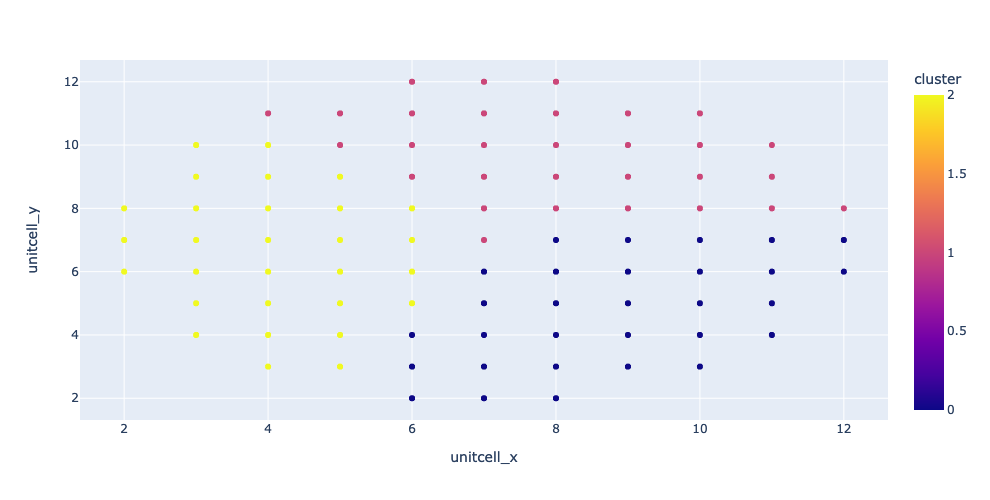

[0]


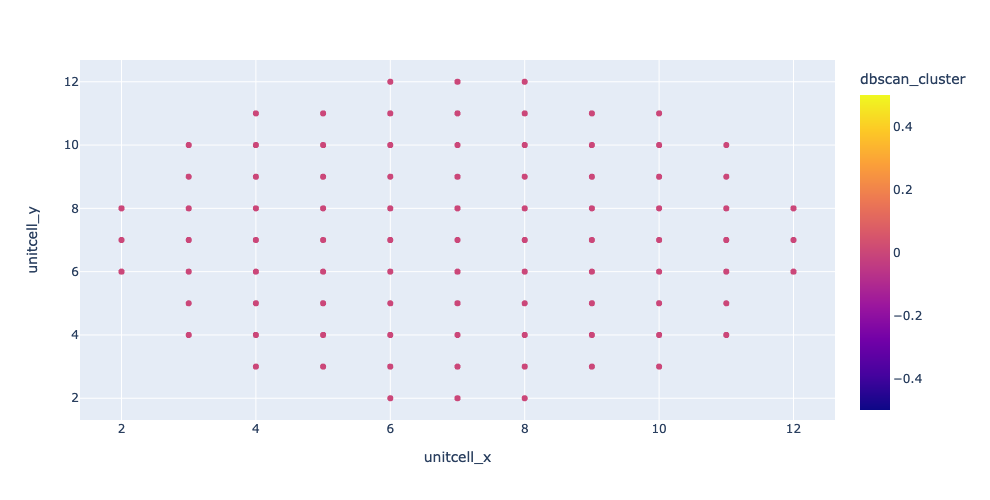

In [5]:
clusterdf = pd.read_csv('zA_shdwcac_fails_wftcoord.csv')
grouping = ['unitcell_x','unitcell_y','fails']
weight = 'fails'
for schema, geokeydf in clusterdf.groupby(['schema']):
    geokey = geokeydf['geographykey'].iloc[0]
    print(geokey)
    #geodf = ibmdata.isdw.geography.get_geography(geokey=geokey)
    
    #kmeans = KMeans(n_clusters=2,n_jobs=-1, random_state=22)
    km = KMeans(
        n_clusters=3, init='random',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )
    dbs = cluster.DBSCAN(eps=1.1, min_samples=2)
    
    clusterdf = geokeydf.copy()
    #clusterdf = geokeydf.groupby(grouping).agg({weight:'mean'}).reset_index()
    display(clusterdf)
    clusterdf['cluster'] = km.fit_predict(clusterdf[['unitcell_x','unitcell_y']].values)#, sample_weight=clusterdf[weight])
    #km.fit(x)
    fig = px.scatter(clusterdf, x='unitcell_x', y='unitcell_y', color='cluster', width=800, height=500)
    fig.show()
    clusterdf['dbscan_cluster'] = dbs.fit_predict(clusterdf[['unitcell_x','unitcell_y']].values)#, sample_weight=clusterdf[weight])
    print(clusterdf['dbscan_cluster'].unique())
    fig = px.scatter(clusterdf[~clusterdf['dbscan_cluster'].isin([-1])], x='unitcell_x', y='unitcell_y', color='dbscan_cluster', width=800, height=500)
    fig.show()       
    #display(clusterdf)

lot_id_base      wafer_id_xy  wafer_id  geographykey radius_center_5  \
1016        AZCZF  AZCZF-17/14/103  AZCZF-17      66809515               D   
1017        AZCZF  AZCZF-17/14/116  AZCZF-17      66809531               E   
1018        AZCZF   AZCZF-17/14/38  AZCZF-17      66809435               E   
1019        AZCZF   AZCZF-17/14/51  AZCZF-17      66809451               D   
1020        AZCZF   AZCZF-17/14/64  AZCZF-17      66809467               D   
...           ...              ...       ...           ...             ...   
12391       AZD0A   AZD0A-16/54/12  AZD0A-16      66810243               E   
12392       AZD0A  AZD0A-16/54/129  AZD0A-16      66810387               D   
12393       AZD0A  AZD0A-16/54/142  AZD0A-16      66810403               E   
12394       AZD0A   AZD0A-16/54/51  AZD0A-16      66810291               B   
12395       AZD0A    AZD0A-16/6/64  AZD0A-16      66809366               E   

       normalized_testx  normalized_testy  unitcell_x  unitcell_y schema  \
1016                 14               103           3           9  zadd2   
1017                 14               116           3          10  zadd2   
1018                 14                38           3           4  zadd2   
1019                 14                51           3           5  zadd2   
1020                 14                64           3           6  zadd2   
...                 ...               ...         ...         ...    ...   
12391                54                12           8           2  zadd2   
12392                54               129           8          11  zadd2   
12393                54               142           8          12  zadd2   
12394                54                51           8           5  zadd2   
12395                 6                64           2           6  zadd2   

       counts  fails  
1016      0.0    0.0  
1017      0.0    0.0  
1018      0.0    0.0  
1019      0.0    0.0  
1020      0.0    0.0  
...       ...    ...  
12391     0.0    0.0  
12392     0.0    0.0  
12393     0.0    0.0  
12394     0.0    0.0  
12395     0.0    0.0  

[137 rows x 12 columns]

/usr/local/lib/python3.9/site-packages/ibmdata/plot/wafermap/_plotly.py:457: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.9/site-packages/ibmdata/plot/wafermap/_plotly.py:458: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



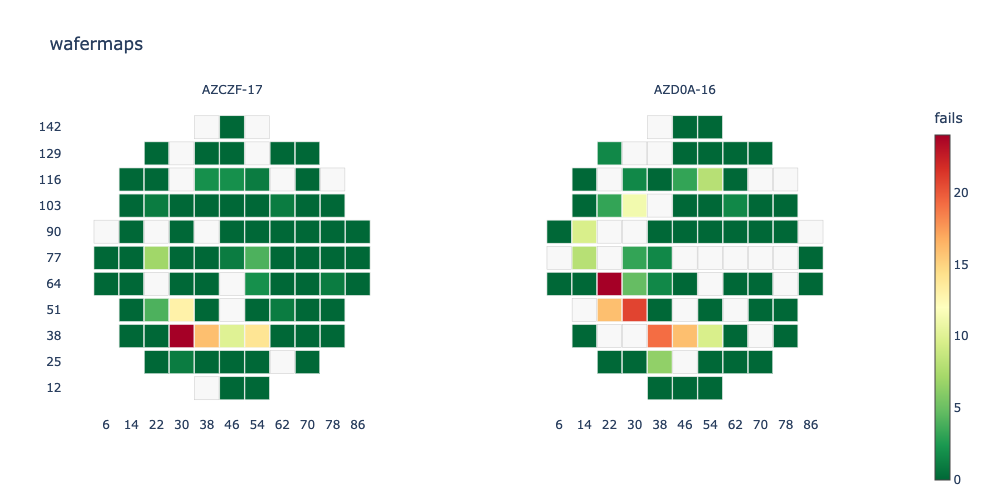

66809515


/usr/local/lib/python3.9/site-packages/ibmdata/plot/wafermap/_plotly.py:457: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.9/site-packages/ibmdata/plot/wafermap/_plotly.py:458: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



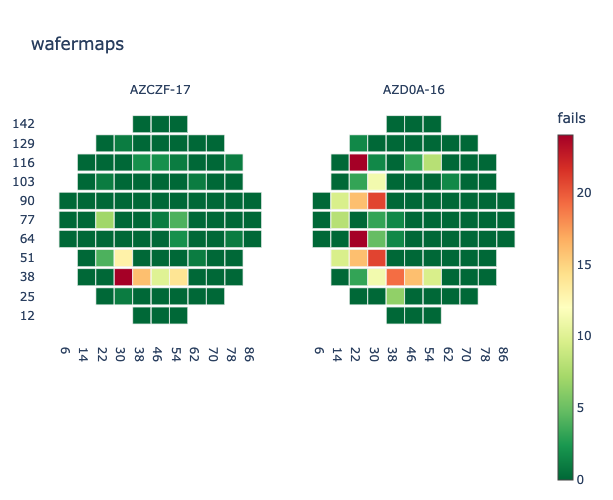

In [101]:
import ibmdata
from ibmdata.plot.wafermap import wafermap, wafermap_gallery, WafermapConfig
import matplotlib as mpl
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

clusterdf = pd.read_csv('zA_shdwcac_fails_wftcoord.csv')
clusterdf = clusterdf[clusterdf['wafer_id'].isin(['AZD0A-16','AZCZF-17'])]
#clusterdf = clusterdf[clusterdf['wafer_id'].isin(['AZD0A-16','AZCZF-17','AZD06-19','AZD0A-21'])]
display(clusterdf)

width = 800
height = 500
columns = 2

display(
    wafermap_gallery(
        WafermapConfig(
            clusterdf, 
            chipx_column='normalized_testx', 
            chipy_column='normalized_testy', 
            color_by_column='fails', 
            colormap = mpl.cm.RdYlGn.reversed(),
            #discrete=True, 
            title=f"wafermaps",
            plot_type='plotly',
            #plot_type='mpl',
            width=width,
            height=height,
            show_kerf_borders=False
        ), 
        wafer_column='wafer_id',
        columns = columns
    )
)

filldfs = []

for geo, geodf in clusterdf.groupby(['schema']):
    print(geodf[['geographykey']].iloc[0][0])
    schema_geodf = ibmdata.isdw.geography.get_geography(geokey=geodf[['geographykey']].iloc[0][0])
    schema_geodf = schema_geodf[schema_geodf.devloc.eq(0) & schema_geodf.unitcell_x.ne(0)]
    #display(schema_geodf)
    wafx = 'unitcell_x'
    wafy = 'unitcell_y'
    wafx_cols = schema_geodf[wafx].unique()
    wafx_cols.sort()
    wafy_cols = schema_geodf[wafy].unique()
    wafy_cols.sort()
    for wafer, waferdf in geodf.groupby(['wafer_id']):
        tempdf = pd.merge(schema_geodf[[wafx,wafy]], waferdf[[wafx,wafy,'fails']], how="left", on=[wafx,wafy], suffixes=["","_drop"])
        pivotdf = pd.pivot_table(tempdf, values='fails', index=[wafy], columns=[wafx], dropna=False).reset_index()
        pivotdf = pivotdf.drop(columns=[wafy])
        X = pivotdf.to_numpy()
        imputer = KNNImputer(n_neighbors=1,weights='distance')
        #print(X)
        #imputer.fit(X)
        newX = imputer.fit_transform(X)
        #print(X)
        #newX = imputer.transform(X)
        #print(newX)
        newdf = pd.DataFrame(newX, columns = wafx_cols, index = wafy_cols).reset_index()
        newdf = newdf.rename(columns = {'index':wafy})
        newXdf = pd.melt(newdf, id_vars=[wafy], value_vars=wafx_cols, var_name=wafx, value_name='fails')
        newXdf = pd.merge(schema_geodf, newXdf[[wafx,wafy,'fails']], how="left", on=[wafx,wafy], suffixes=["","_drop"])
        newXdf['wafer_id'] = wafer
        filldfs.append(newXdf)
    
filldf = pd.concat(filldfs)
    
display(
    wafermap_gallery(
        WafermapConfig(
            filldf, 
            chipx_column='normalized_testx', 
            chipy_column='normalized_testy', 
            color_by_column='fails', 
            colormap = mpl.cm.RdYlGn.reversed(),
            #discrete=True, 
            title=f"wafermaps",
            plot_type='plotly',
            #plot_type='mpl',
            width=width,
            height=height,
            show_kerf_borders=False
        ), 
        wafer_column='wafer_id',
        columns = columns
    )
)


lot_id_base      wafer_id_xy  wafer_id  geographykey radius_center_5  \
1016        AZCZF  AZCZF-17/14/103  AZCZF-17      66809515               D   
1017        AZCZF  AZCZF-17/14/116  AZCZF-17      66809531               E   
1018        AZCZF   AZCZF-17/14/38  AZCZF-17      66809435               E   
1019        AZCZF   AZCZF-17/14/51  AZCZF-17      66809451               D   
1020        AZCZF   AZCZF-17/14/64  AZCZF-17      66809467               D   
...           ...              ...       ...           ...             ...   
12393       AZD0A  AZD0A-16/54/142  AZD0A-16      66810403               E   
12394       AZD0A   AZD0A-16/54/51  AZD0A-16      66810291               B   
12395       AZD0A    AZD0A-16/6/64  AZD0A-16      66809366               E   
12408       AZD0A   AZD0A-21/38/51  AZD0A-21      66809923               B   
12409       AZD0A   AZD0A-21/46/25  AZD0A-21      66810071               D   

       normalized_testx  normalized_testy  unitcell_x  unitcell_y schema  \
1016                 14               103           3           9  zadd2   
1017                 14               116           3          10  zadd2   
1018                 14                38           3           4  zadd2   
1019                 14                51           3           5  zadd2   
1020                 14                64           3           6  zadd2   
...                 ...               ...         ...         ...    ...   
12393                54               142           8          12  zadd2   
12394                54                51           8           5  zadd2   
12395                 6                64           2           6  zadd2   
12408                38                51           6           5  zadd2   
12409                46                25           7           3  zadd2   

       counts  fails  
1016      0.0    0.0  
1017      0.0    0.0  
1018      0.0    0.0  
1019      0.0    0.0  
1020      0.0    0.0  
...       ...    ...  
12393     0.0    0.0  
12394     0.0    0.0  
12395     0.0    0.0  
12408    11.0   17.0  
12409    11.0   24.0  

[258 rows x 12 columns]

/usr/local/lib/python3.9/site-packages/ibmdata/plot/wafermap/_plotly.py:457: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.9/site-packages/ibmdata/plot/wafermap/_plotly.py:458: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



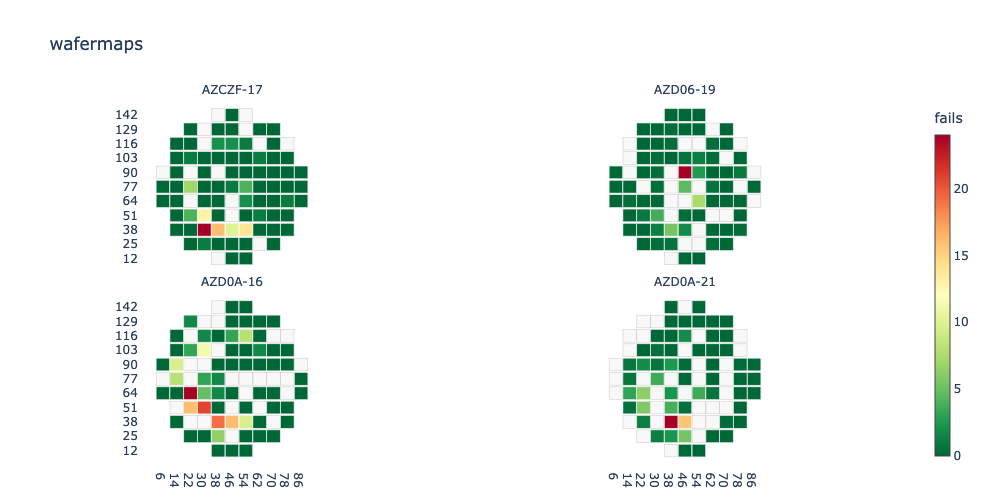

66809515


geographykey  rlse_step_pn  rlse_step_ec  normalized_testx  \
7         66810151  0000003JM477  10000P22636                 46   
15        66810644  0000003JM477  10000P22636                 70   
92        66810387  0000003JM477  10000P22636                 54   
99        66810836  0000003JM477  10000P22636                 78   
115       66810772  0000003JM477  10000P22636                 78   
...            ...           ...           ...               ...   
1590      66810531  0000003JM477  10000P22636                 62   
1596      66810215  0000003JM477  10000P22636                 46   
1625      66810820  0000003JM477  10000P22636                 78   
1634      66810259  0000003JM477  10000P22636                 54   
1641      66810692  0000003JM477  10000P22636                 70   

      normalized_testy  kerf_x  kerf_y  device_exposure_x  device_exposure_y  \
7                   90      42      91                 42                 91   
15                  64      66      65                 66                 65   
92                 129      50     130                 50                130   
99                 103      74     104                 74                104   
115                 51      74      52                 74                 52   
...                ...     ...     ...                ...                ...   
1590               103      58     104                 58                104   
1596               142      42     143                 42                143   
1625                90      74      91                 74                 91   
1634                25      50      26                 50                 26   
1641               103      66     104                 66                104   

     area_center_5  ... security_mask devloc                prop_updt_ts  \
7                A  ...       b'\x00'      0  2021-11-01 16:29:23.673368   
15               B  ...       b'\x00'      0  2021-11-01 16:29:27.869198   
92               C  ...       b'\x00'      0  2021-11-01 16:29:25.648111   
99               C  ...       b'\x00'      0  2021-11-01 16:29:29.712506   
115              C  ...       b'\x00'      0  2021-11-01 16:29:29.206576   
...            ...  ...           ...    ...                         ...   
1590             B  ...       b'\x00'      0  2021-11-01 16:29:26.812438   
1596             D  ...       b'\x00'      0  2021-11-01 16:29:24.278366   
1625             C  ...       b'\x00'      0  2021-11-01 16:29:29.600398   
1634             C  ...       b'\x00'      0  2021-11-01 16:29:24.633145   
1641             B  ...       b'\x00'      0  2021-11-01 16:29:28.386005   

     chiporientation superchiplet unitcell_x unitcell_y  x_center_ply_logical  \
7                 ll            N          7          8                   0.0   
15                ll            N         10          6                   0.0   
92                ll            N          8         11                   0.0   
99                ll            N         11          9                   0.0   
115               ll            N         11          5                   0.0   
...              ...          ...        ...        ...                   ...   
1590              ll            N          9          9                   0.0   
1596              ll            N          7         12                   0.0   
1625              ll            N         11          8                   0.0   
1634              ll            N          8          3                   0.0   
1641              ll            N         10          9                   0.0   

      y_center_ply_logical  devloc_name  
7                      0.0               
15                     0.0               
92                     0.0               
99                     0.0               
115                    0.0               
...                    ...          ...  
1590                   0.0               
1596  

/usr/local/lib/python3.9/site-packages/ibmdata/plot/wafermap/_plotly.py:457: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.9/site-packages/ibmdata/plot/wafermap/_plotly.py:458: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



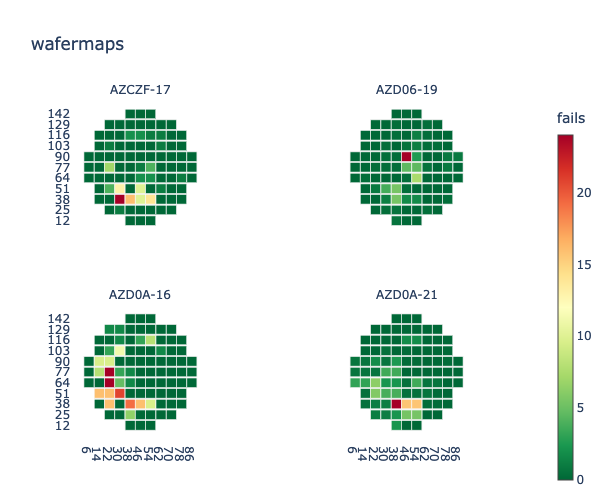

In [103]:
import ibmdata
from ibmdata.plot.wafermap import wafermap, wafermap_gallery, WafermapConfig
import matplotlib as mpl
import pandas as pd
import numpy as np
from scipy import interpolate

clusterdf = pd.read_csv('zA_shdwcac_fails_wftcoord.csv')
#clusterdf = clusterdf[clusterdf['wafer_id'].isin(['AZD0A-16','AZCZF-17'])]
clusterdf = clusterdf[clusterdf['wafer_id'].isin(['AZD0A-16','AZCZF-17','AZD06-19','AZD0A-21'])]
display(clusterdf)

width = 800
height = 500
columns = 2

display(
    wafermap_gallery(
        WafermapConfig(
            clusterdf, 
            chipx_column='normalized_testx', 
            chipy_column='normalized_testy', 
            color_by_column='fails', 
            colormap = mpl.cm.RdYlGn.reversed(),
            #discrete=True, 
            title=f"wafermaps",
            plot_type='plotly',
            #plot_type='mpl',
            width=width,
            height=height,
            show_kerf_borders=False
        ), 
        wafer_column='wafer_id',
        columns = columns
    )
)

filldfs = []

for geo, geodf in clusterdf.groupby(['schema']):
    print(geodf[['geographykey']].iloc[0][0])
    schema_geodf = ibmdata.isdw.geography.get_geography(geokey=geodf[['geographykey']].iloc[0][0])
    schema_geodf = schema_geodf[schema_geodf.devloc.eq(0) & schema_geodf.unitcell_x.ne(0)]
    display(schema_geodf)
    wafx = 'unitcell_x'
    wafy = 'unitcell_y'
    wafx_cols = schema_geodf[wafx].unique()
    wafx_cols.sort()
    wafy_cols = schema_geodf[wafy].unique()
    wafy_cols.sort()
    for wafer, waferdf in geodf.groupby(['wafer_id']):
        tempdf = pd.merge(schema_geodf[[wafx,wafy]], waferdf[[wafx,wafy,'fails']], how="left", on=[wafx,wafy], suffixes=["","_drop"])
        pivotdf = pd.pivot_table(tempdf, values='fails', index=[wafy], columns=[wafx], dropna=False).reset_index()
        pivotdf = pivotdf.drop(columns=[wafy])
        array = pivotdf.to_numpy()
        
        #mask invalid values
        array = np.ma.masked_invalid(array)
        xx, yy = np.meshgrid(wafx_cols, wafy_cols)
        #get only the valid values
        x1 = xx[~array.mask]
        y1 = yy[~array.mask]
        newarr = array[~array.mask]

        #method = ['linear', 'nearest', 'cubic']
        GD1 = interpolate.griddata((x1, y1), newarr.ravel(), (xx, yy), method='nearest')
        
        newdf = pd.DataFrame(GD1, columns = wafx_cols, index = wafy_cols).reset_index()
        newdf = newdf.rename(columns = {'index':wafy})
        newXdf = pd.melt(newdf, id_vars=[wafy], value_vars=wafx_cols, var_name=wafx, value_name='fails')
        newXdf = pd.merge(schema_geodf, newXdf[[wafx,wafy,'fails']], how="left", on=[wafx,wafy], suffixes=["","_drop"])
        newXdf['wafer_id'] = wafer
        filldfs.append(newXdf)
    
filldf = pd.concat(filldfs)
    
display(
    wafermap_gallery(
        WafermapConfig(
            filldf, 
            chipx_column='normalized_testx', 
            chipy_column='normalized_testy', 
            color_by_column='fails', 
            colormap = mpl.cm.RdYlGn.reversed(),
            #discrete=True, 
            title=f"wafermaps",
            plot_type='plotly',
            #plot_type='mpl',
            width=width,
            height=height,
            show_kerf_borders=False
        ), 
        wafer_column='wafer_id',
        columns = columns
    )
)


lot_id_base     wafer_id_xy  wafer_id   array_cell  geographykey  \
77976       A231T   A231T-02/8/65  A231T-02  CAY_L3C_MAC      66858654   
77977       A231T   A231T-03/8/65  A231T-03  CAY_L3C_MAC      66858654   
77978       A231T   A231T-04/8/65  A231T-04  CAY_L3C_MAC      66858654   
77979       A231T   A231T-05/8/65  A231T-05  CAY_L3C_MAC      66858654   
77980       A231T   A231T-06/8/65  A231T-06  CAY_L3C_MAC      66858654   
...           ...             ...       ...          ...           ...   
89719       A231T  A231T-21/35/98  A231T-21  CAY_L3C_MAC      66859060   
89720       A231T  A231T-21/44/98  A231T-21  CAY_L3C_MAC      66859115   
89721       A231T  A231T-21/53/98  A231T-21  CAY_L3C_MAC      66859250   
89722       A231T  A231T-21/62/98  A231T-21  CAY_L3C_MAC      66859389   
89723       A231T  A231T-21/71/98  A231T-21  CAY_L3C_MAC      66859589   

       normalized_testx  normalized_testy  unitcell_x  unitcell_y  \
77976                 8                65           2           7   
77977                 8                65           2           7   
77978                 8                65           2           7   
77979                 8                65           2           7   
77980                 8                65           2           7   
...                 ...               ...         ...         ...   
89719                35                98           5          10   
89720                44                98           6          10   
89721                53                98           7          10   
89722                62                98           8          10   
89723                71                98           9          10   

      radius_center_5  schema         split  chip_cnt  yield  dbccount  \
77976               E  p10dd2  gh.65::GH.65         1      1         0   
77977               E  p10dd2  gh.65::GH.65         1      0         1   
77978               E  p10dd2  gh.65::GH.65         1      1         0   
77979               E  p10dd2  gh.65::GH.65         1      1         0   
77980               E  p10dd2  gh.65::GH.65         1      1         0   
...               ...     ...           ...       ...    ...       ...   
89719               D  p10dd2  gh.65::GH.65         1      1         0   
89720               D  p10dd2  gh.65::GH.65         1      1         0   
89721               D  p10dd2  gh.65::GH.65         1      1         0   
89722               D  p10dd2  gh.65::GH.65         1      1         0   
89723               D  p10dd2  gh.65::GH.65         1      1         0   

       f_per_1gb_dbc  
77976        0.00000  
77977        0.39587  
77978        0.00000  
77979        0.00000  
77980        0.00000  
...              ...  
89719        0.00000  
89720        0.00000  
89721        0.00000  
89722        0.00000  
89723        0.00000  

[1617 rows x 16 columns]

lot_id_base     wafer_id_xy  wafer_id   array_cell  geographykey  \
77976       A231T   A231T-02/8/65  A231T-02  CAY_L3C_MAC      66858654   
77977       A231T   A231T-03/8/65  A231T-03  CAY_L3C_MAC      66858654   
77978       A231T   A231T-04/8/65  A231T-04  CAY_L3C_MAC      66858654   
77979       A231T   A231T-05/8/65  A231T-05  CAY_L3C_MAC      66858654   
77980       A231T   A231T-06/8/65  A231T-06  CAY_L3C_MAC      66858654   
...           ...             ...       ...          ...           ...   
89719       A231T  A231T-21/35/98  A231T-21  CAY_L3C_MAC      66859060   
89720       A231T  A231T-21/44/98  A231T-21  CAY_L3C_MAC      66859115   
89721       A231T  A231T-21/53/98  A231T-21  CAY_L3C_MAC      66859250   
89722       A231T  A231T-21/62/98  A231T-21  CAY_L3C_MAC      66859389   
89723       A231T  A231T-21/71/98  A231T-21  CAY_L3C_MAC      66859589   

       normalized_testx  normalized_testy  unitcell_x  unitcell_y  \
77976                 8                65           2           7   
77977                 8                65           2           7   
77978                 8                65           2           7   
77979                 8                65           2           7   
77980                 8                65           2           7   
...                 ...               ...         ...         ...   
89719                35                98           5          10   
89720                44                98           6          10   
89721                53                98           7          10   
89722                62                98           8          10   
89723                71                98           9          10   

      radius_center_5  ...         split chip_cnt  yield  dbccount  \
77976               E  ...  gh.65::GH.65        1      1         0   
77977               E  ...  gh.65::GH.65        1      0         1   
77978               E  ...  gh.65::GH.65        1      1         0   
77979               E  ...  gh.65::GH.65        1      1         0   
77980               E  ...  gh.65::GH.65        1      1         0   
...               ...  ...           ...      ...    ...       ...   
89719               D  ...  gh.65::GH.65        1      1         0   
89720               D  ...  gh.65::GH.65        1      1         0   
89721               D  ...  gh.65::GH.65        1      1         0   
89722               D  ...  gh.65::GH.65        1      1         0   
89723               D  ...  gh.65::GH.65        1      1         0   

       f_per_1gb_dbc  lot_id_base_num  wafer_id_num  wafer_id_xy_num  \
77976        0.00000                0             1              118   
77977        0.39587                0             2              179   
77978        0.00000                0             3              240   
77979        0.00000                0             4              305   
77980        0.00000                0             5              364   
...              ...              ...           ...              ...   
89719        0.00000                0            19             1278   
89720        0.00000                0            19             1286   
89721        0.00000                0            19             1294   
89722        0.00000                0            19             1301   
89723        0.00000                0            19             1309   

       radius_center_5_num  label  
77976                    4      2  
77977                    4      2  
77978                    4      2  
77979                    4      2  
77980                    4      2  
...                    ...    ...  
89719                    3      0  
89720                    3      0  
89721                    3      0  
89722                    3      0  
89723                    3      0  

[1617 rows x 21 columns]

0


/usr/local/lib/python3.9/site-packages/ibmdata/plot/wafermap/_plotly.py:457: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.9/site-packages/ibmdata/plot/wafermap/_plotly.py:458: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



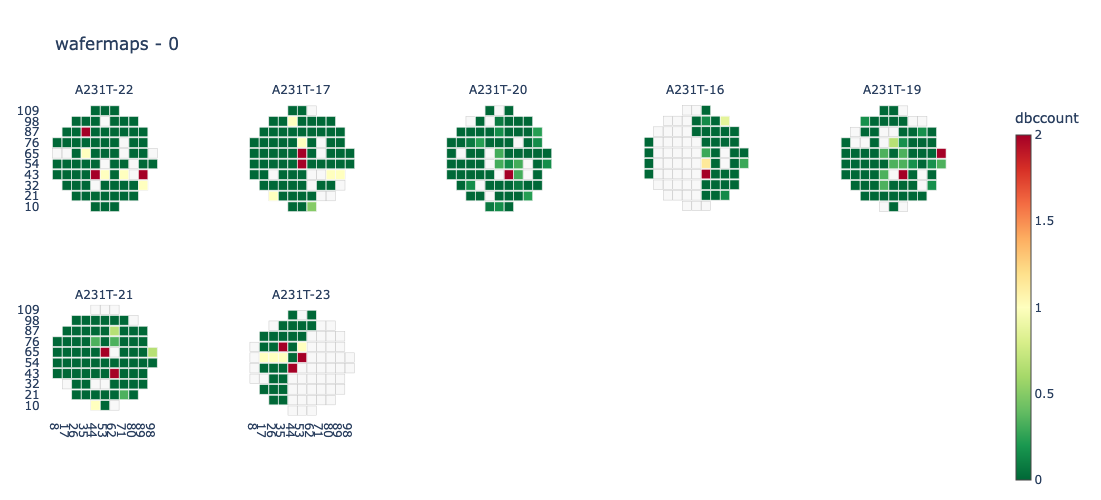

/usr/local/lib/python3.9/site-packages/ibmdata/plot/wafermap/_plotly.py:457: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.9/site-packages/ibmdata/plot/wafermap/_plotly.py:458: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1


/usr/local/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



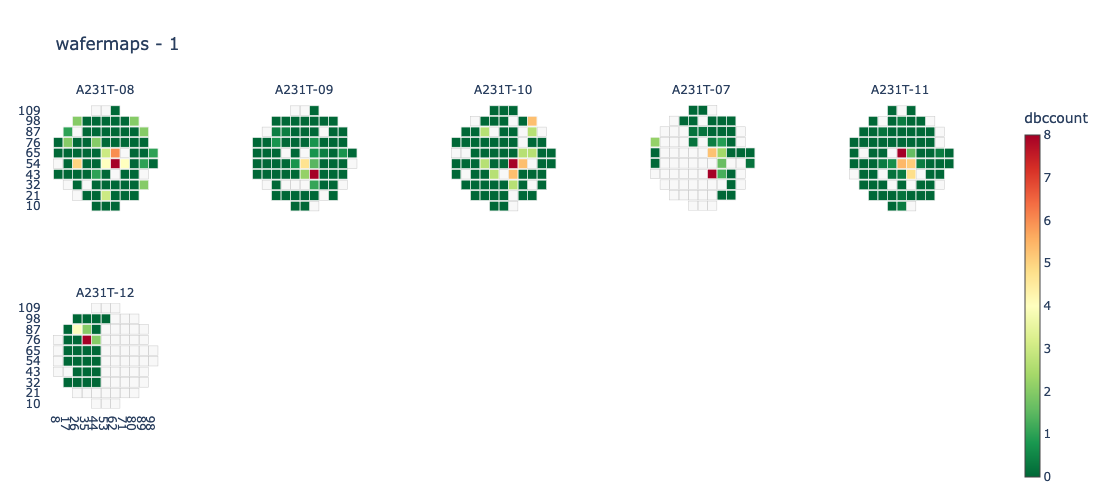

/usr/local/lib/python3.9/site-packages/ibmdata/plot/wafermap/_plotly.py:457: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.9/site-packages/ibmdata/plot/wafermap/_plotly.py:458: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2


/usr/local/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



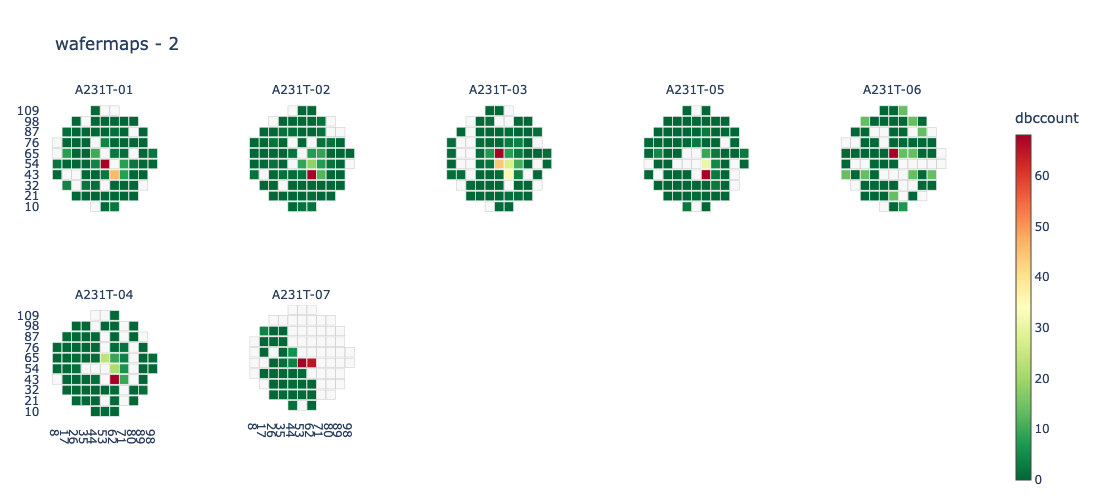

/usr/local/lib/python3.9/site-packages/ibmdata/plot/wafermap/_plotly.py:457: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.9/site-packages/ibmdata/plot/wafermap/_plotly.py:458: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3


/usr/local/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



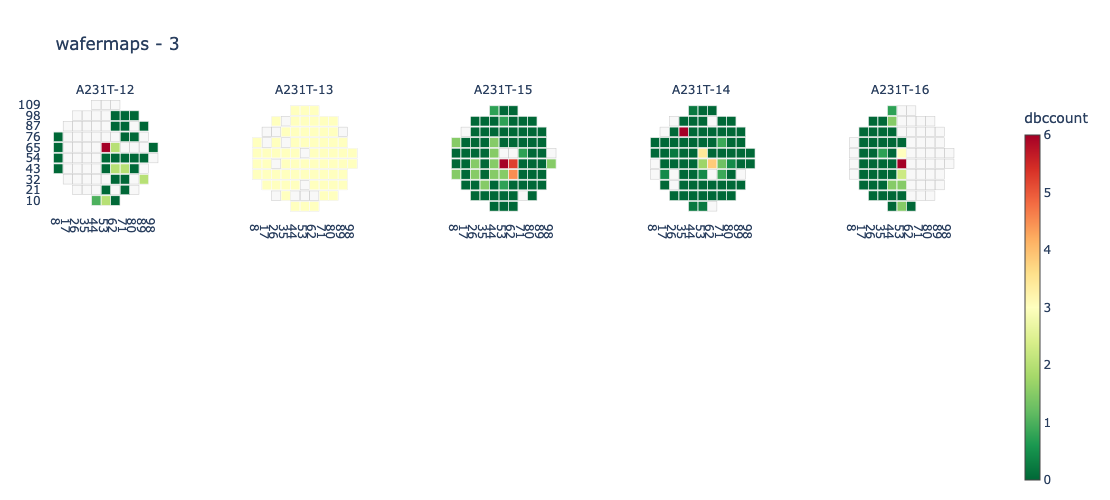

/usr/local/lib/python3.9/site-packages/ibmdata/plot/wafermap/_plotly.py:457: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.9/site-packages/ibmdata/plot/wafermap/_plotly.py:458: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



4


/usr/local/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



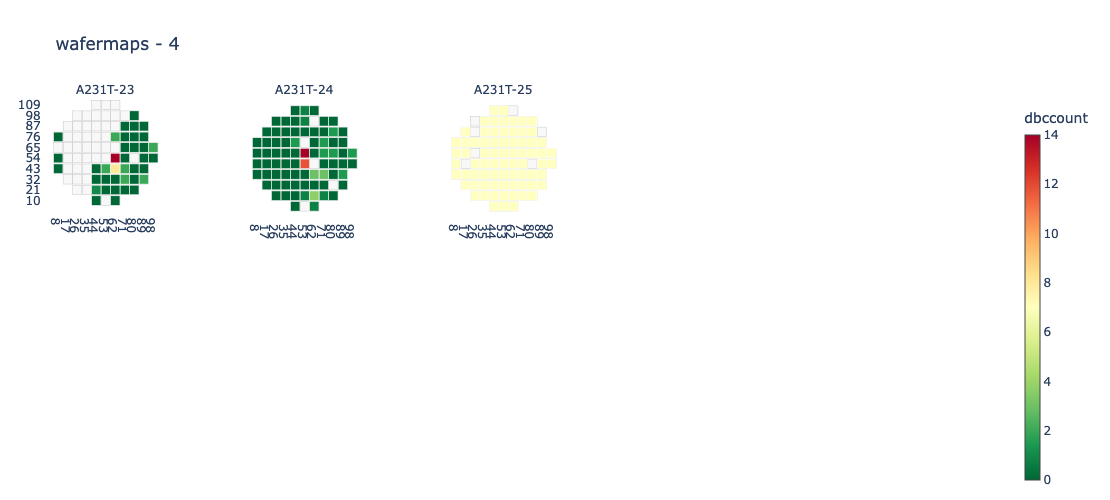

In [24]:
import ibmdata
from ibmdata.plot.wafermap import wafermap, wafermap_gallery, WafermapConfig
import matplotlib as mpl
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering

clusterdf = pd.read_csv('p10_za_wft_sram_dbc_fails.csv')
clusterdf = clusterdf[clusterdf['lot_id_base'].isin(['A231T'])]
#clusterdf = clusterdf[clusterdf['wafer_id'].isin(['AZD0A-16','AZCZF-17','AZD06-19','AZD0A-21'])]
display(clusterdf)

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clusterdf[["radius_center_5","wafer_id","wafer_id_xy","lot_id_base"]] = clusterdf[["radius_center_5","wafer_id","wafer_id_xy","lot_id_base"]].astype('category')
components = ['lot_id_base','wafer_id','wafer_id_xy','radius_center_5']
groups = ['normalized_testx','normalized_testy']

components_num = []
for component in components:
    clusterdf[f'{component}_num'] = clusterdf[component].cat.codes
    components_num.append(f'{component}_num')
#radius = {'A': 1,'B':2,'C':3,'D':4,'E':5}
#clusterdf['radius_num'] = [radius[val] for val in clusterdf.radius_center_5]
clusterdf['label'] = cluster.fit_predict(clusterdf[components_num+groups+['f_per_1gb_dbc','dbccount','yield']])

display(clusterdf)

width = 800
height = 500
columns = 5

for label, labeldf in clusterdf.groupby(['label']):
    print(label)
    display(
        wafermap_gallery(
            WafermapConfig(
                labeldf, 
                chipx_column='normalized_testx', 
                chipy_column='normalized_testy', 
                color_by_column='dbccount', 
                colormap = mpl.cm.RdYlGn.reversed(),
                #discrete=True, 
                title=f"wafermaps - {label}",
                plot_type='plotly',
                #plot_type='mpl',
                width=width,
                height=height,
                show_kerf_borders=False
            ), 
            wafer_column='wafer_id',
            columns = columns
        )
    )


In [19]:
from sklearn.datasets import make_swiss_roll

n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)
# Make it thinner
X[:, 1] *= 0.5
display(X)
from sklearn.cluster import AgglomerativeClustering

print("Compute unstructured hierarchical clustering...")
ward = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X)
label = ward.labels_
print(f"Number of points: {label.size}")

array([[  5.39622188,   7.33853691,  12.69892846],
       [ 11.93936236,   0.12002839,  -3.10654994],
       [ -8.9765545 ,   4.77746332,   1.9552719 ],
       ...,
       [ -0.90456894,   6.8931101 , -10.96110791],
       [  3.40295855,   1.33669088,   6.47110373],
       [  3.73461394,   3.47437215, -10.70244753]])

Compute unstructured hierarchical clustering...
Number of points: 1500


In [21]:
import ibmdata
df = ibmdata.isdw.query(f"""
select distinct pe_product_schema, rlse_step_pn, rlse_step_ec
from
(
    select testedwaferpass.pe_product_schema, geography.rlse_step_pn, geography.rlse_step_ec, geography.geography_updt_ts,
    ROW_NUMBER() OVER(PARTITION BY testedwaferpass.pe_product_schema ORDER BY geography.geography_updt_ts DESC) AS row_number
    from 
    testedchippass
    join geography on testedchippass.geographykey = geography.geographykey
    join testedwaferpass on testedchippass.testedwaferpasskey = testedwaferpass.testedwaferpasskey
    left join pedata_pn_master on pedata_pn_master.partnumber = testedwaferpass.pe_chip_pn
    where
    testedwaferpass.pe_product_schema in ('p10dd1','p10dd2','zadd2')
    and rlse_step_pn not in ('GENERAL','')
)
where row_number = 1
""")
display(df)

pe_product_schema  rlse_step_pn  rlse_step_ec
0            p10dd1  0000002WP435  10000P22204 
1            p10dd2  0000002WP644  10000P22229 
2             zadd2  0000003JM477  10000P22636

/var/folders/56/cfmz315s09g6zv7qvb074jgm0000gn/T/ipykernel_51604/1218681804.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schema_geodf['rankx'] = schema_geodf[wafx].rank(method='dense').astype(int)
/var/folders/56/cfmz315s09g6zv7qvb074jgm0000gn/T/ipykernel_51604/1218681804.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schema_geodf['ranky'] = schema_geodf[wafy].rank(method='dense').astype(int)


geographykey  rlse_step_pn  rlse_step_ec  normalized_testx  \
0         66810243  0000003JM477  10000P22636                 54   
8         66810467  0000003JM477  10000P22636                 62   
26        66810387  0000003JM477  10000P22636                 54   
47        66810612  0000003JM477  10000P22636                 70   
66        66809847  0000003JM477  10000P22636                 30   
...            ...           ...           ...               ...   
1636      66809366  0000003JM477  10000P22636                  6   
1637      66809382  0000003JM477  10000P22636                  6   
1638      66809435  0000003JM477  10000P22636                 14   
1639      66809451  0000003JM477  10000P22636                 14   
1652      66809923  0000003JM477  10000P22636                 38   

      normalized_testy  kerf_x  kerf_y  device_exposure_x  device_exposure_y  \
0                   12      50      13                 50                 13   
8                   51      58      52                 58                 52   
26                 129      50     130                 50                130   
47                  38      66      39                 66                 39   
66                 129      26     130                 26                130   
...                ...     ...     ...                ...                ...   
1636                64       2      65                  2                 65   
1637                77       2      78                  2                 78   
1638                38      10      39                 10                 39   
1639                51      10      52                 10                 52   
1652                51      34      52                 34                 52   

     area_center_5  ... chiporientation superchiplet unitcell_x unitcell_y  \
0                D  ...              ll            N          8          2   
8                B  ...              ll            N          9          5   
26               C  ...              ll            N          8         11   
47               C  ...              ll            N         10          4   
66               C  ...              ll            N          5         11   
...            ...  ...             ...          ...        ...        ...   
1636             D  ...              ll            N          2          6   
1637             D  ...              ll            N          2          7   
1638             D  ...              ll            N          3          4   
1639             C  ...              ll            N          3          5   
1652             A  ...              ll            N          6          5   

     x_center_ply_logical y_center_ply_logical devloc_name  exclusion  rankx  \
0                     0.0                  0.0    zArtemis     4500.0      7   
8                     0.0                  0.0    zArtemis     4500.0      8   
26                    0.0                  0.0    zArtemis     4500.0      7   
47                    0.0                  0.0    zArtemis     4500.0      9   
66                    0.0                  0.0    zArtemis     4500.0      4   
...                   ...                  ...         ...        ...    ...   
1636                  0.0                  0.0    zArtemis     4500.0      1   
1637                  0.0                  0.0    zArtemis     4500.0      1   
1638                  0.0                  0.0    zArtemis     4500.0      2   
1639                  0.0                  0.0    zArtemis     4500.0      2   
1652                  0.0                  0.0    zArtemis     4500.0      5   

      ranky  
0         1  
8         4  
26       10  
47        3  
66       10  
...     ...  
1636      5  
1637      6  
1638      3  
1639      4  
1652      4  

[89 rows x 41 columns]

geographykey  rlse_step_pn  rlse_step_ec  normalized_testx  \
407      66809939  0000003JM477  10000P22636                 38   

     normalized_testy  kerf_x  kerf_y  device_exposure_x  device_exposure_y  \
407                64      34      65                 34                 65   

    area_center_5  ... chiporientation superchiplet unitcell_x unitcell_y  \
407             A  ...              ll            N          6          6   

    x_center_ply_logical y_center_ply_logical devloc_name  exclusion  rankx  \
407                  0.0                  0.0    zArtemis     4500.0      5   

     ranky  
407      5  

[1 rows x 41 columns]

lot_id_base      wafer_id_xy  wafer_id  geographykey radius_center_5  \
0           AZCZF  AZCZF-01/14/103  AZCZF-01      66809515               D   
1           AZCZF  AZCZF-01/14/116  AZCZF-01      66809531               E   
2           AZCZF   AZCZF-01/14/38  AZCZF-01      66809435               E   
3           AZCZF   AZCZF-01/14/51  AZCZF-01      66809451               D   
4           AZCZF   AZCZF-01/14/77  AZCZF-01      66809483               D   
...           ...              ...       ...           ...             ...   
46238       AZD2Z  AZD2Z-15/78/103  AZD2Z-15      66810836               D   
46239       AZD2Z   AZD2Z-15/78/38  AZD2Z-15      66810756               E   
46240       AZD2Z   AZD2Z-15/78/51  AZD2Z-15      66810772               D   
46241       AZD2Z   AZD2Z-15/78/77  AZD2Z-15      66810804               D   
46242       AZD2Z   AZD2Z-15/78/90  AZD2Z-15      66810820               D   

       normalized_testx  normalized_testy  unitcell_x  unitcell_y schema  ...  \
0                    14               103           3           9  zadd2  ...   
1                    14               116           3          10  zadd2  ...   
2                    14                38           3           4  zadd2  ...   
3                    14                51           3           5  zadd2  ...   
4                    14                77           3           7  zadd2  ...   
...                 ...               ...         ...         ...    ...  ...   
46238                78               103          11           9  zadd2  ...   
46239                78                38          11           4  zadd2  ...   
46240                78                51          11           5  zadd2  ...   
46241                78                77          11           7  zadd2  ...   
46242                78                90          11           8  zadd2  ...   

       devloc                prop_updt_ts  chiporientation  superchiplet  \
0           0  2021-11-01 16:29:17.580035               ll             N   
1           0  2021-11-01 16:29:17.753333               ll             N   
2           0  2021-11-01 16:29:16.407142               ll             N   
3           0  2021-11-01 16:29:16.652374               ll             N   
4           0  2021-11-01 16:29:17.145650               ll             N   
...       ...                         ...              ...           ...   
46238       0  2021-11-01 16:29:29.712506               ll             N   
46239       0  2021-11-01 16:29:29.076796               ll             N   
46240       0  2021-11-01 16:29:29.206576               ll             N   
46241       0  2021-11-01 16:29:29.477719               ll             N   
46242       0  2021-11-01 16:29:29.600398               ll             N   

       x_center_ply_logical y_center_ply_logical devloc_name  exclusion  \
0                       0.0                  0.0    zArtemis     4500.0   
1                       0.0                  0.0    zArtemis     4500.0   
2                       0.0                  0.0    zArtemis     4500.0   
3                       0.0                  0.0    zArtemis     4500.0   
4                       0.0                  0.0    zArtemis     4500.0   
...                     ...                  ...         ...        ...   
46238                   0.0                  0.0    zArtemis     4500.0   
46239                   0.0                  0.0    zArtemis     4500.0   
46240                   0.0                  0.0    zArtemis     4500.0   
46241                   0.0                  0.0    zArtemis     4500.0   
46242                   0.0                  0.0    zArtemis     4500.0   

       rankx  ranky  
0          2      8  
1          2      9  
2          2      3  
3          2      4  
4          2      6  
...      ...    ...  
46238     10      8  
46239     10      3  
46240     10      4  
46241     10      6  
46242     10      7  

[46243 rows x 53 

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_o

[<AxesSubplot:title={'center':'1-2'}>,
 <AxesSubplot:title={'center':'2-720'}>,
 <AxesSubplot:title={'center':'3-1'}>,
 <AxesSubplot:title={'center':'4-5'}>,
 <AxesSubplot:title={'center':'5-1'}>]

Index(['wafer_id', 'result', 'fail_mean', 'fail_max', 'delta'], dtype='object')
['A290X-11', 'A290X-21', 'A290X-21', 'A290X-11', 'A290X-11', 'A290X-21', 'A290V-01', 'A290X-08', 'A293G-15', 'A293G-05', 'AZD2Y-06', 'A293H-17', 'AZCZK-07', 'AZD12-20', 'AZD0A-09', 'AZD0A-09', 'AZD0A-09', 'AZD0A-09', 'AZCZZ-21', 'AZCZZ-10', 'AZCZZ-11', 'AZCZZ-21', 'AZCZZ-10', 'AZCZZ-21', 'AZCZZ-25', 'AZCZZ-22', 'AZCZV-22', 'AZCZV-22', 'AZCZV-22', 'AZCZV-22']


/var/folders/56/cfmz315s09g6zv7qvb074jgm0000gn/T/ipykernel_51604/1218681804.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampledf['result'] = sampledf['result'].astype(object)


lot_id_base     wafer_id_xy  wafer_id  geographykey radius_center_5  \
1572        AZCZK  AZCZK-07/14/38  AZCZK-07      66809435               E   
1573        AZCZK  AZCZK-07/14/51  AZCZK-07      66809451               D   
1574        AZCZK  AZCZK-07/14/64  AZCZK-07      66809467               D   
1575        AZCZK  AZCZK-07/14/77  AZCZK-07      66809483               D   
1576        AZCZK  AZCZK-07/14/90  AZCZK-07      66809499               D   
...           ...             ...       ...           ...             ...   
39321       A290V  A290V-01/78/51  A290V-01      66810772               D   
39322       A290V  A290V-01/78/77  A290V-01      66810804               D   
39323       A290V  A290V-01/78/90  A290V-01      66810820               D   
39324       A290V  A290V-01/86/64  A290V-01      66810899               E   
39325       A290V  A290V-01/86/77  A290V-01      66810915               E   

       normalized_testx  normalized_testy  unitcell_x  unitcell_y schema  ...  \
1572                 14                38           3           4  zadd2  ...   
1573                 14                51           3           5  zadd2  ...   
1574                 14                64           3           6  zadd2  ...   
1575                 14                77           3           7  zadd2  ...   
1576                 14                90           3           8  zadd2  ...   
...                 ...               ...         ...         ...    ...  ...   
39321                78                51          11           5  zadd2  ...   
39322                78                77          11           7  zadd2  ...   
39323                78                90          11           8  zadd2  ...   
39324                86                64          12           6  zadd2  ...   
39325                86                77          12           7  zadd2  ...   

       chiporientation  superchiplet  x_center_ply_logical  \
1572                ll             N                   0.0   
1573                ll             N                   0.0   
1574                ll             N                   0.0   
1575                ll             N                   0.0   
1576                ll             N                   0.0   
...                ...           ...                   ...   
39321               ll             N                   0.0   
39322               ll             N                   0.0   
39323               ll             N                   0.0   
39324               ll             N                   0.0   
39325               ll             N                   0.0   

       y_center_ply_logical  devloc_name exclusion rankx  ranky  result  \
1572                    0.0     zArtemis    4500.0     2      3       2   
1573                    0.0     zArtemis    4500.0     2      4       2   
1574                    0.0     zArtemis    4500.0     2      5       2   
1575                    0.0     zArtemis    4500.0     2      6       2   
1576                    0.0     zArtemis    4500.0     2      7       2   
...                     ...          ...       ...   ...    ...     ...   
39321                   0.0     zArtemis    4500.0    10      4       2   
39322                   0.0     zArtemis    4500.0    10      6       2   
39323                   0.0     zArtemis    4500.0    10      7       2   
39324                   0.0     zArtemis    4500.0    11      5       2   
39325                   0.0     zArtemis    4500.0    11      6       2   

       wafer_cnt  
1572         720  
1573         720  
1574         720  
1575         720  
1576         720  
...          ...  
39321        720  
39322        720  
39323        720  
39324        720  
39325        720  

[1117 rows x 55 columns]

[<AxesSubplot:title={'center':'A290X-11'}>,
 <AxesSubplot:title={'center':'A290X-21'}>]

[<AxesSubplot:title={'center':'AZCZK-07'}>,
 <AxesSubplot:title={'center':'AZD12-20'}>,
 <AxesSubplot:title={'center':'A290X-08'}>,
 <AxesSubplot:title={'center':'A293G-05'}>,
 <AxesSubplot:title={'center':'AZD2Y-06'}>,
 <AxesSubplot:title={'center':'A293G-15'}>,
 <AxesSubplot:title={'center':'A293H-17'}>,
 <AxesSubplot:title={'center':'A290V-01'}>]

[<AxesSubplot:title={'center':'AZD0A-09'}>]

[<AxesSubplot:title={'center':'AZCZZ-10'}>,
 <AxesSubplot:title={'center':'AZCZZ-11'}>,
 <AxesSubplot:title={'center':'AZCZZ-21'}>,
 <AxesSubplot:title={'center':'AZCZZ-22'}>,
 <AxesSubplot:title={'center':'AZCZZ-25'}>]

[<AxesSubplot:title={'center':'AZCZV-22'}>]

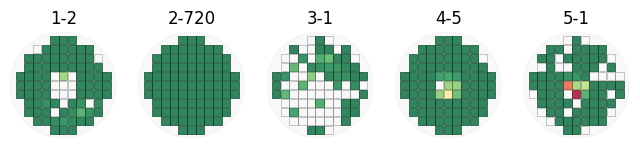

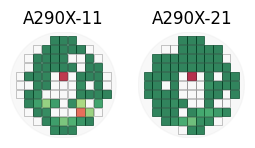

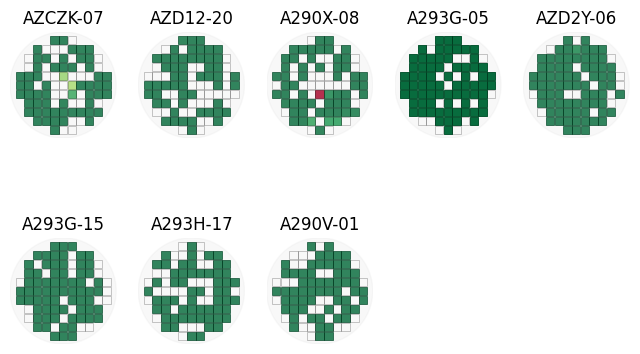

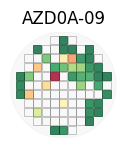

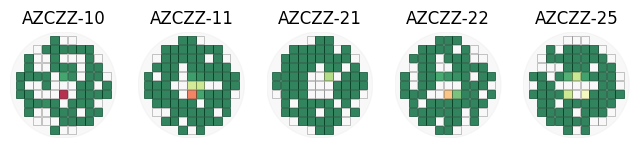

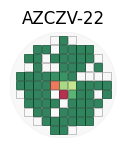

In [3]:
import ibmdata
import pandas as pd
import RobustFeatureExtraction as rfe

from ibmdata.plot.wafermap import wafermap, wafermap_gallery, WafermapConfig
import matplotlib as mpl

from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.spatial.distance import squareform

#pulldf = pd.read_csv("p10_za_wft_sram_dbc_fails.csv")
pulldf = pd.read_csv("zA_all_shdwcac_fails_wftcoord.csv")
failcol = 'fails'
wafx = 'unitcell_x'
wafy = 'unitcell_y'
interpolate_wmap = False

import functools
import itertools

schema = rfe.join_schema(pulldf)
productdf = rfe.get_product_step_pn(pulldf[schema].unique())
for prod, proddf in productdf.groupby([schema]):
    schema_geodf = ibmdata.isdw.geography.get_geography(stepec=proddf[['rlse_step_ec']].iloc[0][0])
    schema_geodf = schema_geodf.loc[schema_geodf.devloc.eq(0) & schema_geodf.unitcell_x.ne(0)]
    schema_geodf['rankx'] = schema_geodf[wafx].rank(method='dense').astype(int)
    schema_geodf['ranky'] = schema_geodf[wafy].rank(method='dense').astype(int)
    display(schema_geodf)
    display(schema_geodf[(schema_geodf['rankx']==5) & (schema_geodf['ranky']==5)])
    P = schema_geodf['rankx'].max()
    Q = schema_geodf['ranky'].max()
    #print(schema_geodf[['rankx','ranky']].to_numpy())
    validcoords = [tuple(coord) for coord in schema_geodf[['rankx','ranky']].to_numpy()]
    allcoords = [tuple(coord) for coord in list(itertools.product(range(1,P+1),range(1,Q+1)))]
    ignore = [coord for coord in allcoords if coord not in validcoords]
    
    #allcoorddf = pd.merge(pd.DataFrame({'rankx':range(1, P+1)}),pd.DataFrame({'ranky':range(1, Q+1)}), how='cross')
    #missingcoorddf = pd.merge(allcoorddf, schema_geodf[['rankx','ranky']
    
    
    if interpolate_wmap:
        filldfs = interpolate_wmaps(pulldf[pulldf[schema]==prod], failcol, schema_geodf)
        df = pd.concat(filldfs)
    else:
        df = pd.merge(pulldf,schema_geodf,how='left',on=[wafx,wafy],suffixes=["","_drop"])

    display(df)
    
    wafers, B, Alpha = rfe.parseData(df, groupby = 'wafer_id', b_input = failcol, x = wafx, y = wafy, P = P, Q = Q, ignore = ignore)
    #wafers, B, Alpha = rfe.parseDataOld(df, groupby = 'wafer_id', b_input =failcol, x = wafx, y = wafy, family_code = pulldf[[schema]].iloc[0][0])

    etas = []
    nonzero_indices = []
    for i in range(len(wafers)):
        omp = OrthogonalMatchingPursuit(n_nonzero_coefs=15, normalize=False)
        omp.fit(Alpha[i], B[i])
        coef = omp.coef_
        (idx_r,) = coef.nonzero()
        etas.append(coef)
        nonzero_indices.append(idx_r)

    DistMatrix = rfe.createEuclidianDistanceMatrix(etas)
    dists = squareform(DistMatrix)
    linkage_matrix = linkage(dists, "complete")

    #results = fcluster(linkage_matrix, t=300, criterion='distance')
    results = fcluster(linkage_matrix, t=5, criterion='maxclust')

    from collections import defaultdict
    clusters = defaultdict(list)
    for i, c in enumerate(results):
        clusters[c].append(wafers[i])

    resultsdf = pd.DataFrame(data={'wafer_id':wafers, 'result':results})
    resultsdf['wafer_cnt'] = resultsdf.groupby('result').wafer_id.transform('count')
    classifieddf = pd.merge(df, resultsdf, on=['wafer_id'], how='left')
    
    plotdf = classifieddf.groupby(['normalized_testx','normalized_testy','geographykey','result','wafer_cnt']).agg({failcol:'mean'}).reset_index()
    plotdf['result'] = plotdf['result'].astype(str) + '-' + plotdf['wafer_cnt'].astype(str)
    #plotdf['result'] = plotdf['result'].astype(object)


    width = 800
    height = 500
    columns = 5

    display(
        wafermap_gallery(
            WafermapConfig(
                plotdf, 
                chipx_column='normalized_testx', 
                chipy_column='normalized_testy', 
                color_by_column=failcol, 
                colormap = mpl.cm.RdYlGn.reversed(),
                #discrete=True, 
                title=f"wafermaps",
                #plot_type='plotly',
                plot_type='mpl',
                width=width,
                height=height,
                show_kerf_borders=False
            ), 
            wafer_column='result',
            columns = columns
        )
    )


    if interpolate_wmap:
        wafsumdf = classifieddf.groupby(['wafer_id','result']).agg(missing_cnt=('missing_cnt','mean'), fail_mean=(failcol,'mean'), fail_max=(failcol,'max')).reset_index()
    else:
        wafsumdf = classifieddf.groupby(['wafer_id','result']).agg(fail_mean=(failcol,'mean'), fail_max=(failcol,'max')).reset_index()
    wafsumdf['delta'] = wafsumdf['fail_max'] - wafsumdf['fail_mean']
    print(wafsumdf.columns)

    sample_wafers = []
    for res, resdf in wafsumdf.groupby(['result']):
        resdf.sort_values(['delta'], inplace=True)
        sample_wafers.extend(resdf['wafer_id'].head(1))
        sample_wafers.extend(resdf['wafer_id'].tail(1))
        sample_wafers.extend(resdf['wafer_id'].sample(min(len(resdf),2)))
        if interpolate_wmap:
            resdf.sort_values(['missing_cnt'], inplace=True)
            sample_wafers.extend(resdf['wafer_id'].head(1))
            sample_wafers.extend(resdf['wafer_id'].tail(1))
            sample_wafers.extend(resdf['wafer_id'].sample(min(len(resdf),2)))
        else:
            sample_wafers.extend(resdf['wafer_id'].sample(min(len(resdf),4)))

    print(sample_wafers)

    sampledf = classifieddf[classifieddf['wafer_id'].isin(sample_wafers)]
    sampledf['result'] = sampledf['result'].astype(object)
    display(sampledf)

    width = 800
    height = 500
    columns = 5

    for res, resdf in sampledf.groupby(['result']):
        display(
            wafermap_gallery(
                WafermapConfig(
                    resdf, 
                    chipx_column='normalized_testx', 
                    chipy_column='normalized_testy', 
                    color_by_column=failcol, 
                    colormap = mpl.cm.RdYlGn.reversed(),
                    #discrete=True, 
                    title=f"wafermaps - {res}",
                    #plot_type='plotly',
                    plot_type='mpl',
                    width=width,
                    height=height,
                    show_kerf_borders=False
                ), 
                wafer_column='wafer_id',
                columns = columns
            )
        )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(89, 121)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(89,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(89, 121)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(89,)
[[0. 0. 0. ... 0. 0. 0.]

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: Runtime

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(89, 121)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(89,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(89, 121)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(89,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: Runtime

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(89, 121)
[0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 8. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 2. 0. 2. 0. 3. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
(89,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(89, 121)
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  2.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0. 12.  0.  0.  0.  0.]
(89,)
[[0. 0. 0. ... 0. 0. 0

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: Runtime

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(89, 121)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(89,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(89, 121)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(89,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: Runtime

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(89, 121)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(89,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(89, 121)
[ 0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  1.  0.  4. 11.  0.  0.  0.  3.  0.  0.  0.  0.
  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  4.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  1.  0.  0.  0.  0.  3.  0.  0.  0.  0.  9.  0.  0.  0.  1.]
(89,)
[[0. 0. 0. ... 0. 0. 0

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: Runtime

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(89, 121)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(89,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(89, 121)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(89,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning:

Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: Runtime

Summary


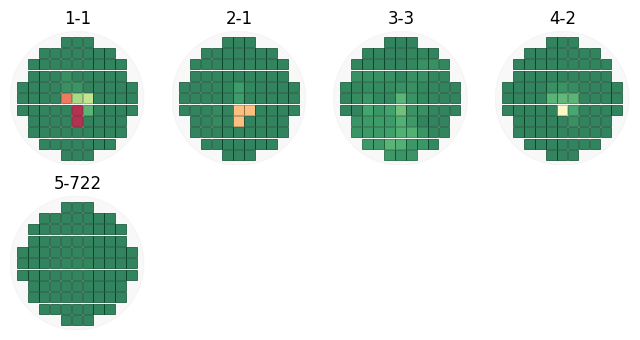

Samples
group = 1


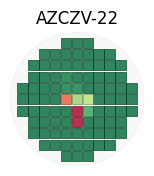

group = 2


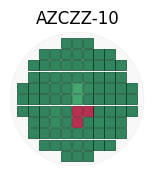

group = 3


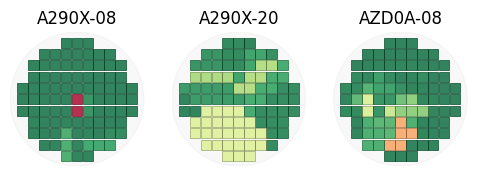

group = 4


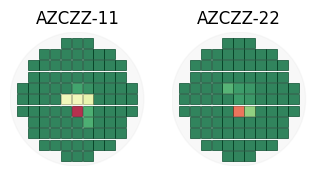

group = 5


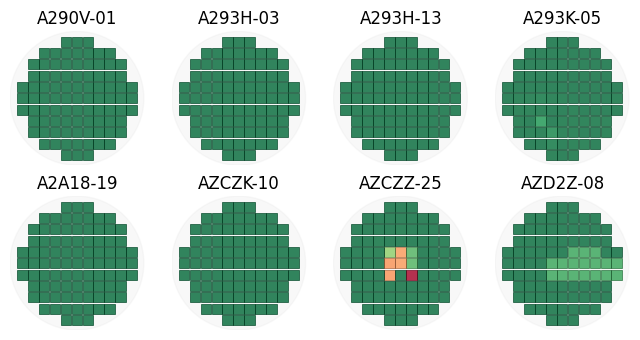

In [79]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import RobustFeatureExtraction as rfe
import warnings
#warnings.filterwarnings("error")

#pulldf = pd.read_csv("p10_za_wft_sram_dbc_fails.csv")
pulldf = pd.read_csv("zA_all_shdwcac_fails_wftcoord.csv")
failcol = 'fails'
wafx = 'unitcell_x'
wafy = 'unitcell_y'
interpolate_wmap = True
t = 500

rfe.runRobustFeatureExtraction(pulldf, failcol, t, wafx, wafy, interpolate_wmap)
